# Simulator's Clock Experiments
This notebook is dedicated to generating plots of the data retrieved from the cluster spread period experiments.

In [1]:
from statistics import mean
import seaborn as sns
from cluster_utils import retrieve_executions_as_dataframe, \
    build_experiment_results_data_dict
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os

# 1. Read stored lists from csv file
In this section, the data is parsed from the stored lists and prepared to be plotted.

In [2]:
towns_data_dict = build_experiment_results_data_dict(number_of_experiments=10, folder_name='cluster_experiments_clock_lesspop', experiment_folder="cluster_experiments_clock_lesspop")

INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2022-02-25 16:27:35,900 - Entering the data_town_0 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2022-02-25 16:27:36,122 - Entering the data_town_1 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2022-02-25 16:27:36,311 - Entering the data_town_2 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2022-02-25 16:27:36,500 - Entering the data_town_3 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2022-02-25 16:27:36,689 - Entering the data_town_4 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2022-02-25 16:27:36,885 - Entering the data_town_5 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2022-02-25 16:27:37,088 - Entering the data_town_6 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2022-02-25 16:27:37,295 - Ent

In [3]:
def set_plot_styles(title: str, x_label: str, y_label: str, save_file_name: str,
                    legend_location: str = 'upper right', legend_labels = None, title_size: int = 15,
                    labels_size: int = 10, ticks_size: int = 10, legend_size = 10, xticks_rotation: int = 45):

    if legend_labels is None:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

    if legend_labels is None:
        plt.legend(ncol=1, loc=legend_location, fontsize=legend_size)
    else:
        plt.legend(labels=legend_labels, loc=legend_location, fontsize=legend_size + 2)

    plt.title(title, fontsize=title_size)
    plt.xlabel(x_label, fontsize=labels_size)
    plt.ylabel(y_label, fontsize=labels_size)

    plt.xticks(fontsize=ticks_size, rotation=xticks_rotation)
    plt.yticks(fontsize=ticks_size)

    plt.savefig(save_file_name, bbox_inches='tight')
    plt.show()

# Confirmed cases vs Time: 20K population size.

Retrieving results for town 0.
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Time sizes: 599
Retrieving results for town 1.
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Time sizes: 599
Retrieving results for town 2.
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Time sizes: 599
Retrieving results for town 3.
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Time sizes: 599
Retrieving results for town 4.
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Time sizes: 599
Retrieving results for town 5.
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Exec sizes: 599
Time sizes: 599


<Figure size 936x720 with 0 Axes>

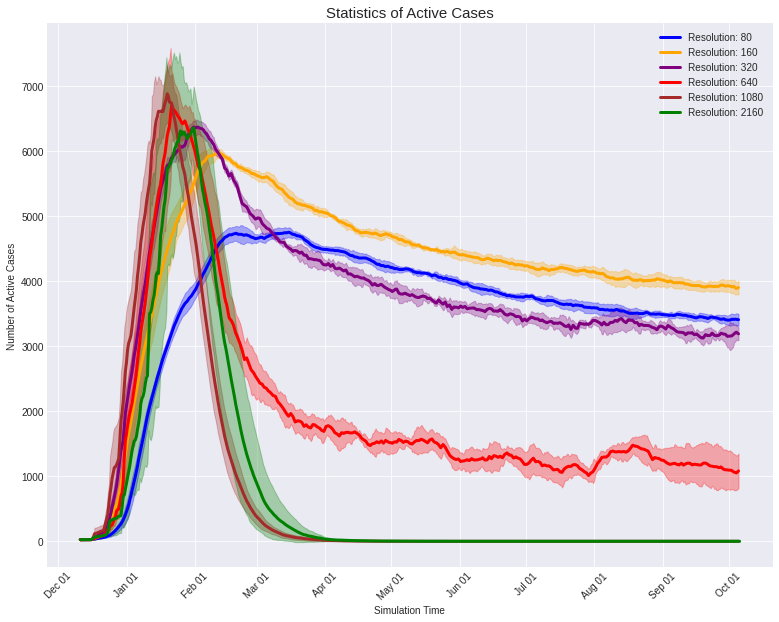

In [4]:
seeds = [idx for idx in range(5)]

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))


towns_df_list = list()
towns_immunity_list = list()
towns_std_list = list()
towns_average_list = list()
colors = ['blue', 'orange', 'purple', 'red', 'brown', 'green', 'yellow', 'darkblue']
labels = [10, 20, 40, 80 ,160 ,320 ,640 ,1080 ,2160 ,5320]
towns_index_list = [3, 4, 5, 6, 7, 8]

for index, town_index in enumerate(towns_index_list):
    print(f'Retrieving results for town {index}.')
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=seeds)

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=f'Resolution: {labels[town_index]}')

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 average_stats - stds,
                 average_stats + stds,
                 color=colors[index], alpha=0.3)

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                legend_location= 'upper right',
                save_file_name='Spread_Period_Effect.pdf')